# Midterm lab - Churn classification

Load the dataset using the file name 

In [1]:
import os
import pandas as pd
import numpy  as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import pandas.plotting as pp

import sklearn
import seaborn as sns; sns.set()

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import time
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

print "-----------------------------------------------------------------------"
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The seaborn version is {}.'.format(sns.__version__))

-----------------------------------------------------------------------
The scikit-learn version is 0.20.3.
The seaborn version is 0.9.0.


In [2]:
#Load the dataset
def loadData(path,filename):
    try:
             files = os.listdir(path)
             for f in files:
                 if f == filename:
                     data = pd.read_csv(os.path.join(path,f), sep=r'\s*,\s*', header=0, encoding='ascii', engine='python')
                     return data
            
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message

In [3]:
#get the working directory and filename
path = r'C:\Users\pmspr\Documents\HS\MS\Sem 2\EECS 738\Lab\Midterm\Code\Data'

In [4]:
#load data using load class and print describe of data
from featureEng import loadData
filename = "ACMETelephoneABT.csv"
data = loadData(path,filename)
data_hold = data.copy()
display(data.describe())

,customer,age,income,numHandsets,handsetAge,currentHandsetPrice,avgBill,avgMins,avgrecurringCharge,avgOverBundleMins,avgRoamCalls,callMinutesChangePct,billAmountChangePct,avgReceivedMins,avgOutCalls,avgInCalls,peakOffPeakRatio,peakOffPeakRatioChangePct,avgDroppedCalls,lifeTime,lastMonthCustomerCareCalls,numRetentionCalls,numRetentionOffersAccepted,newFrequentNumbers
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.049974e+06,30.318400,4.293600,1.804500,390.171700,35.730696,58.927600,521.170645,46.236537,42.392670,1.186048,-0.280848,-0.003595,115.266619,25.208834,8.368029,2.217785,-0.046749,9.992283,18.836300,1.737414,0.044600,0.020700,0.195000
std,2.879841e+04,22.158676,3.139902,1.345088,257.076656,57.072922,43.889815,540.435285,23.964960,106.374374,6.048811,5.231031,0.762955,169.979443,35.665714,17.676847,3.882714,9.973846,14.859162,9.610928,5.754564,0.225867,0.155158,0.641261
min,1.000001e+06,0.000000,0.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-50.355000,-7.600400,0.000000,0.000000,0.000000,0.000000,-41.322736,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025200e+06,0.000000,0.000000,1.000000,210.000000,0.000000,33.327500,150.627500,30.000000,0.000000,0.000000,-1.725000,-0.132600,7.690000,3.000000,0.000000,0.779357,-6.791049,1.670000,11.000000,0.000000,0.000000,0.000000,0.000000
50%,1.049833e+06,34.000000,5.000000,1.000000,339.000000,0.000000,49.205000,359.625000,44.990000,3.000000,0.000000,-0.100000,-0.005200,52.540000,13.330000,2.000000,1.399874,0.011607,5.330000,17.000000,0.000000,0.000000,0.000000,0.000000
75%,1.074990e+06,48.000000,7.000000,2.000000,525.000000,59.990000,71.762500,709.187500,59.990000,43.750000,0.260000,1.300000,0.042600,154.382500,33.330000,9.000000,2.494232,6.494723,12.670000,24.000000,1.330000,0.000000,0.000000,0.000000
max,1.099988e+06,98.000000,9.000000,21.000000,1812.000000,499.990000,584.230000,6336.250000,337.980000,4320.750000,177.990000,50.425000,17.911400,2006.290000,610.330000,304.000000,160.000000,37.779743,304.670000,61.000000,365.670000,4.000000,4.000000,3.000000


Analysis:
Describe can give the highlevel idea of basic statistical insight like count, mean and standard deviation. We can observe that few columns have a considerable difference between their mean and standard deviation which suggest the existence of outliers in those columns.

In [5]:
#Function to explore the data
def exploreData(data):
    try:
        
           #separate features and target
           drop_col = ['churn']
           features = data.drop(drop_col, axis = 1)
           target = data['churn']
        
           #Total number of records                                  
           rows = data.shape[0]
           cols = data.shape[1]          
          
           # Print the results
           print "-----------------------------------------------------------------------"
           print "Total number of records: {}".format(rows)
           print "Total number of features: {}".format(cols)
           print "-----------------------------------------------------------------------"
           return features,target
           
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message

In [6]:
##explore the data
from featureEng import exploreData
features_raw,target_raw = exploreData(data)

-----------------------------------------------------------------------
Total number of records: 10000
Total number of features: 33
-----------------------------------------------------------------------


Analysis:We have 10000 rows of data and 33 features excluding the target column. 
Column 'Churn' is our target column.

Now we can plot the balance levels of columns.

In [7]:
#Visualization of the counts of a feature
def barPlot(l1,l2,xd,yd,title):
    try:
        plt.figure(figsize=(10,5))
        sns.barplot(l1, l2, alpha=0.8)
        plt.title(title)
        plt.ylabel(yd, fontsize=12)
        plt.xlabel(xd, fontsize=12)
        plt.show()
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message

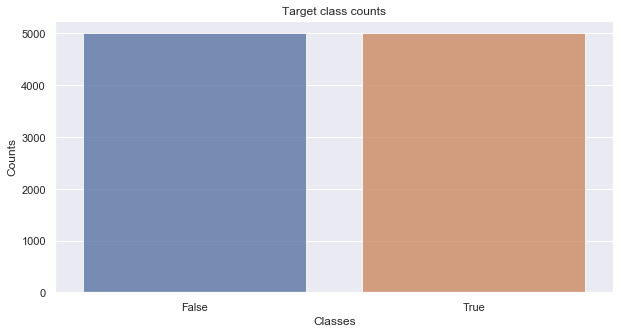

In [8]:
#See the balance of target column
target_counts= target_raw.value_counts()                      
barPlot(target_counts.index,target_counts.values,'Classes','Counts','Target class counts')


Analysis: We can see that the counts of categories are exactly same. The number of Trues is equal to Falses. This says that our data is divided exactly half from target standpoint.

Now we will try to compute the percentage of missing values for each feature. Missing values are important and can be used to get an understanding of density of feature. If we have more missing values in a feature, we can consider to elimante using in our model as its contribution would be ineffecitve. 

In [9]:
def missingValues(data):
    try:
           # Total missing values
           mis_val = data.isnull().sum()
         
           # Percentage of missing values
           mis_val_percent = 100 * mis_val / len(data)
           
           # Make a table with the results
           mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
           
           # Rename the columns
           mis_val_table_ren_columns = mis_val_table.rename(
           columns = {0 : 'Missing Values', 1 : '% of Total Values'})
           mis_val_table_ren_columns.head(4 )
           # Sort the table by percentage of missing descending
           misVal = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                   '% of Total Values', ascending=False).round(1)
           
           # Print some summary information
           print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(misVal.shape[0]) +
              " columns that have missing values.")
           
           display(mis_val_table_ren_columns.head(40))
                      
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message


In [10]:
#Plot missing values of features
missingValues(data)

Your selected dataframe has 33 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
customer,0,0.00
age,0,0.00
occupation,7400,74.00
regionType,4776,47.76
marriageStatus,0,0.00
children,0,0.00
income,0,0.00
numHandsets,0,0.00
handsetAge,0,0.00
smartPhone,0,0.00


Analysis: We can see only two feature has missing values. We considered only NaN as missing values. Zeroes in numerical values and values like 'unknown' are NOT considered as one of them.
    If we see feature 'occupation' 74% of it are missing. So we can consider dropping that feature from our evaluation.

In [11]:
def featureMisval(feature,fname):
    try:
           #check for spaces in the column occupation
           tser = feature
           ind = tser[tser == tser].index
           nind = tser[tser != tser].index
           tser.iloc[ind] = 'fill'
           tser.iloc[nind] = 'missing'
            
           plot_counts= tser.value_counts()                      
           barPlot(plot_counts.index,plot_counts.values,fname,'Counts','Feature counts')           

    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


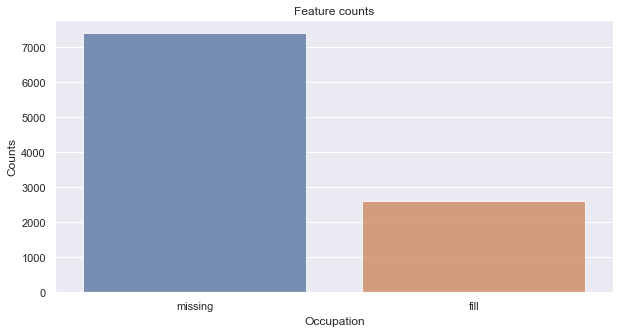

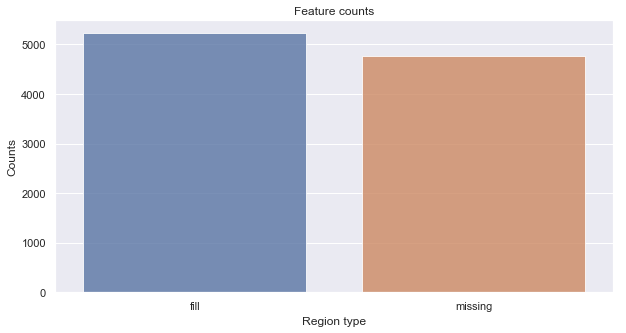

In [12]:
#Plot filled and missing values
featureMisval(data['occupation'],'Occupation')
f = data['regionType']
featureMisval(f,'Region type')

In [13]:
drop_col = ['customer','occupation']
features_raw = features_raw.drop(drop_col, axis = 1)

- Customer feature is dropped as it is an index and would not contribute to our model
- Occupation is dropped because of its 74% missing values.

# Categorical Analysis

Now we will try to see the counts of categorical features by classes in 'Churn'. Like how many counts under 'False' and how many under 'True'

In [14]:
def catCount(feature,target,data): 
    try:
        d_f = data.loc[data[target] == False]
        d_t = data.loc[data[target] == True]
        
        d_f[feature].fillna(value='missing',inplace=True)
        d_t[feature].fillna(value='missing',inplace=True)
         
        f, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True)
        sns.countplot(x=feature, data=d_f,ax=axes[0])
        axes[0].set_title('churn=False')
        sns.countplot(x=feature, data=d_t,ax=axes[1])
        axes[1].set_title('churn=True')    
        for ax in axes:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=65, horizontalalignment='right')                
        plt.show()
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


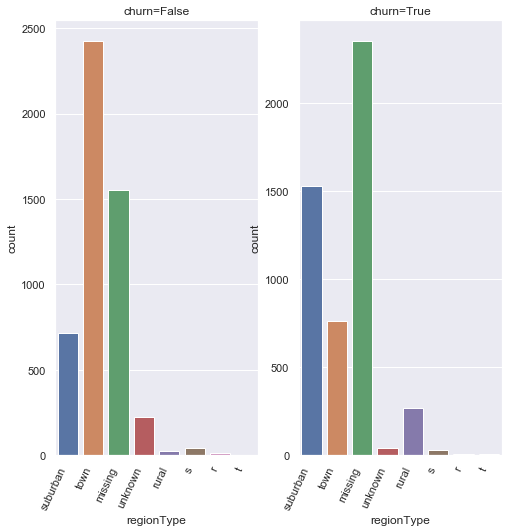

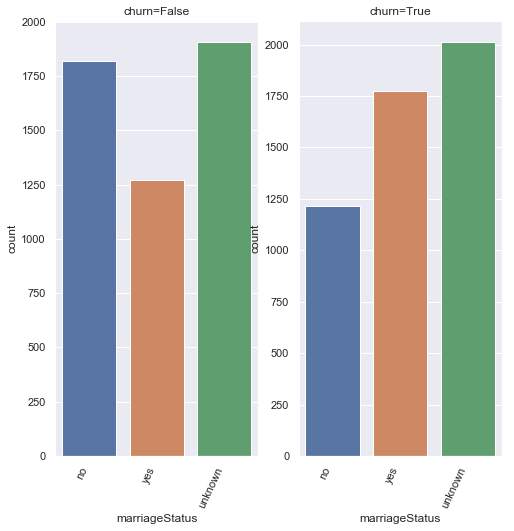

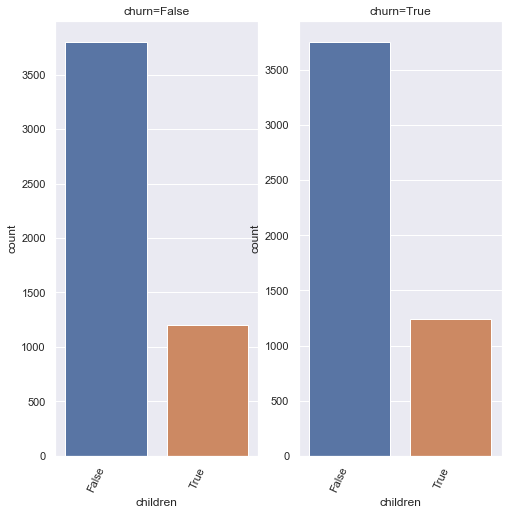

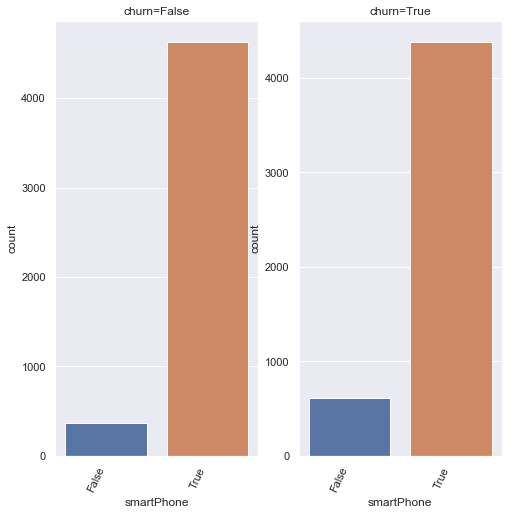

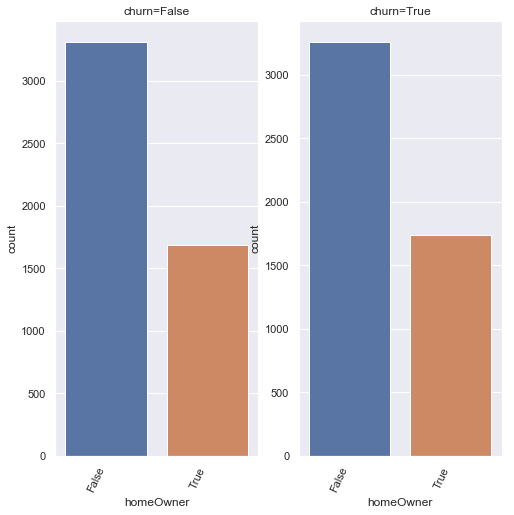

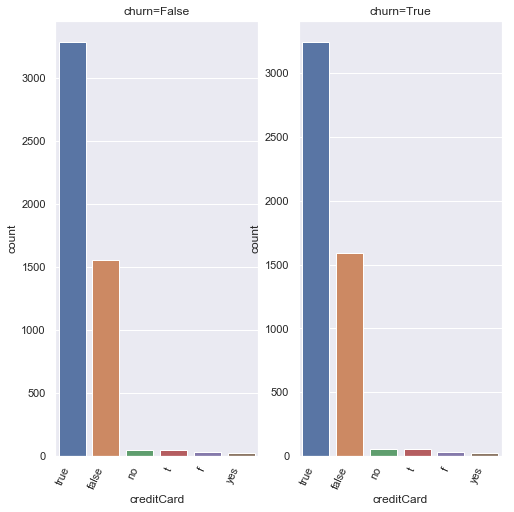

In [15]:
#Plot the distribution of categorical values
data = data_hold
catCount('regionType','churn',data)
catCount('marriageStatus','churn',data)
catCount('children','churn',data)
catCount('smartPhone','churn',data)
catCount('homeOwner','churn',data)
catCount('creditCard','churn',data)

Analysis:
- We can observe that, for below categories, the counts of each is class is almost same for churn=true and churn=false
- For example, features, marriageStatus, children, smartPhone, homeOwner, creditCard different classes has almost same counts. 
- Only feature 'regionType', the counts of different classes are different for churn=true and churn=false. So to fill missing values for this feature, we use class 'town' for indexes where churn='false' and class 'suburban' when churn='true'
- Another observation is, for features, we have classes that are same with different names. Like for feature 'regionType' we have classes 's','r','t' and we can correlate them to 'suburban', 'town' and 'rural' respectively. So we are going to replace 's','r' and 't' respectively.
- Similarly with feature 'creditCard', we can correlate 't' to 'true' and 'f' to 'false'. We are going to replace 't' and 'f' accordingly. 
- One noticeble observation is that our features has a counts that gives similar pattern for churn='true' and churn='false'

# Numerical analysis

- We will try to see the pattern of numerical features using density plan. We will plot patterns, separately, when churn=true and churn=false. By doing that, we can estblish the pattern basing on the target data.
- We can verify the statistics of numerical columns to identify skewness and outliers if any.

In [16]:
def numCount(feature,target,data):
    try:
        d_f = data.loc[data[target] == False]
        d_t = data.loc[data[target] == True]
         
        plt.figure(figsize = (12, 6))
        sns.kdeplot(d_f[feature], label='churn=false')
        sns.kdeplot(d_t[feature], label='churn=true')
        plt.title(feature)
        plt.legend();
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message        

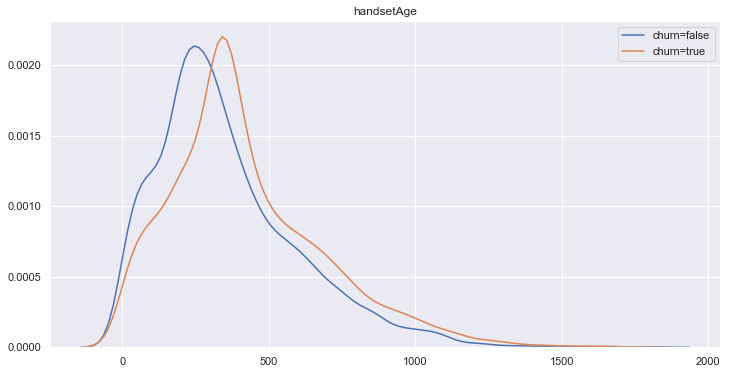

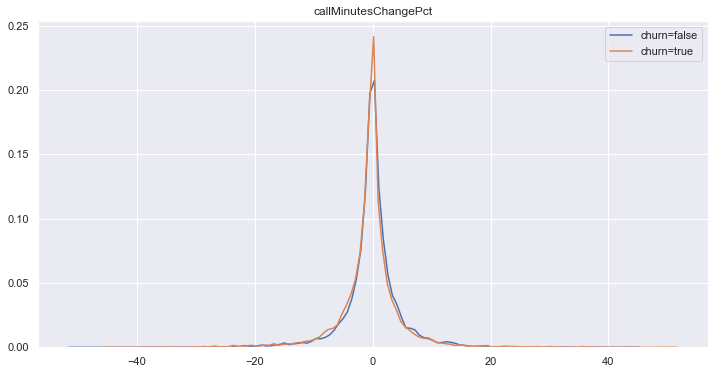

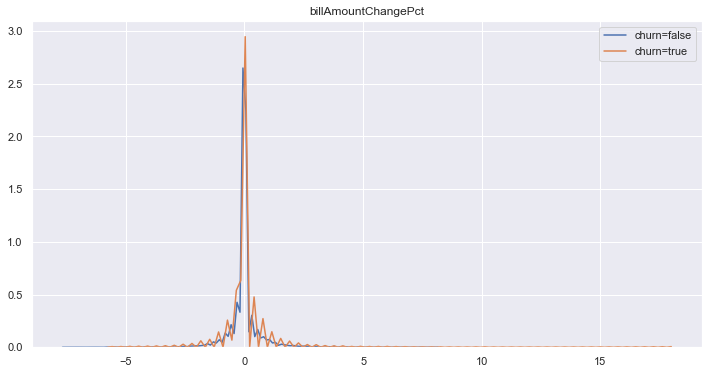

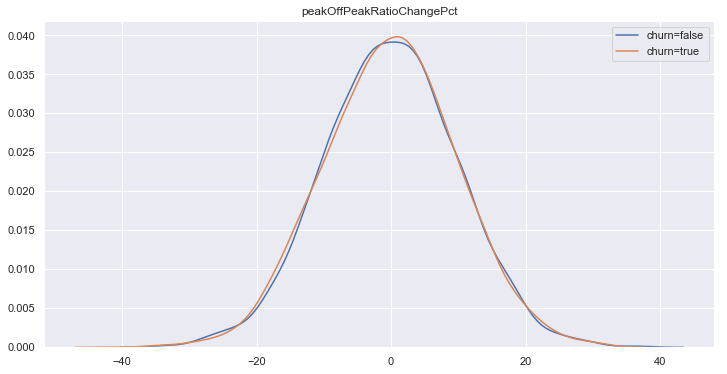

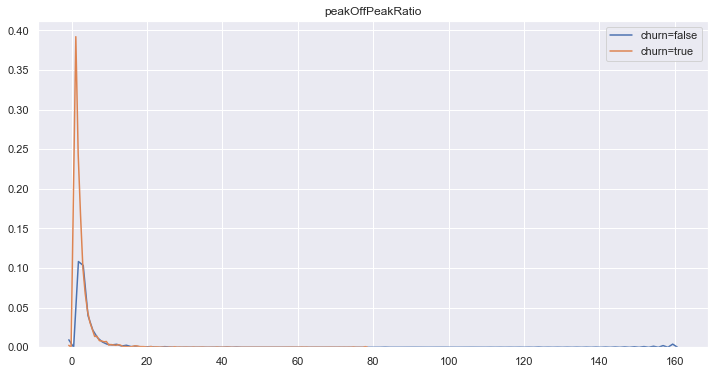

In [17]:
#Plot the density distribution of numerical data
numCount('handsetAge','churn',data)
numCount('callMinutesChangePct','churn',data)
numCount('billAmountChangePct','churn',data)
numCount('peakOffPeakRatioChangePct','churn',data)
numCount('peakOffPeakRatio','churn',data)

- We can see almost similar density patterns between different classes of churn, for differnet numerical features.
- I believe, density plots might not give full insight to decide to avoid a feature or not. I did density plots for few features.
- We will look in to the statistics.

In [18]:
def printStat(data):
    try:
        col = ['customer','occupation','regionType','marriageStatus','children','smartPhone','creditRating','homeOwner','creditCard','churn']
        td = data.drop(col,axis=1)
        #td = data.drop(data.select_dtypes('object'))
        mins = td.min()
        maxs = td.max()
        means = td.mean()
        medians = td.median()
        stds = td.std()
        stats = pd.concat([mins,maxs,means,medians,stds], axis=1)
        stats.columns = ['Min','Max','Mean','Median','Std Dev']
        display(stats.head(25))
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message     

In [19]:
#print statistics of numeric data
data = data_hold
printStat(data)

,Min,Max,Mean,Median,Std Dev
age,0.000000,98.000000,30.318400,34.000000,22.158676
income,0.000000,9.000000,4.293600,5.000000,3.139902
numHandsets,1.000000,21.000000,1.804500,1.000000,1.345088
handsetAge,-5.000000,1812.000000,390.171700,339.000000,257.076656
currentHandsetPrice,0.000000,499.990000,35.730696,0.000000,57.072922
avgBill,0.000000,584.230000,58.927600,49.205000,43.889815
avgMins,0.000000,6336.250000,521.170645,359.625000,540.435285
avgrecurringCharge,0.000000,337.980000,46.236537,44.990000,23.964960
avgOverBundleMins,0.000000,4320.750000,42.392670,3.000000,106.374374
avgRoamCalls,0.000000,177.990000,1.186048,0.000000,6.048811


Analysis:
- We can observe some features having considerable difference between mean and median. We can say such features have outliers.<br>
     skewed = ['handsetAge','currentHandsetPrice','avgrecurringCharge','avgOverBundleMins',
               'avgRoamCalls','avgReceivedMins','avgOutCalls','avgInCalls',
               'peakOffPeakRatio','avgDroppedCalls','lifeTime','lastMonthCustomerCareCalls',
               'numRetentionCalls','numRetentionOffersAccepted','newFrequentNumbers']
- We can observe few features have negative values. This could be a problem when we apply logarthimic transform for scaling.
- We can see the density plots of the features to visualize the distribution. To add an offset.

Now we can see parallel coordinate plot to see if there is any linearity between features.

In [20]:
#parallel plots
def parallelPlot(colList,data):
    try:
        td = pd.DataFrame(columns=colList)
        for col in colList:
            td[col] = data[col]
         
        pp.parallel_coordinates(td,'churn',color=('#556270','#4ECDC4'))
        plt.show()
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message     

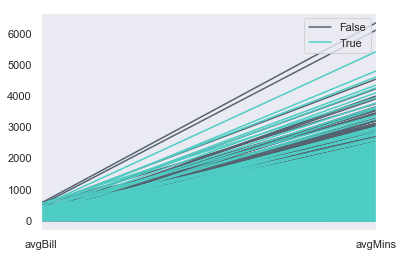

In [21]:
#paralle coordinates plot
colList = ['avgBill','avgMins','churn']
parallelPlot(colList,data)

Analysis
- Above plot is between one set of features. We can see a parallel pattern. We can repeat the same for different sets of features and affirm the same pattern

# Transforming data

In [22]:
def onehotencode(colList,df):
    try:
        df.loc[df.children == True,'children'] = 'tru'
        df.loc[df.children == False,'children'] = 'fal'
        df.loc[df.smartPhone == True,'smartPhone'] = 'tru'
        df.loc[df.smartPhone == False,'smartPhone'] = 'fal'
        df.loc[df.homeOwner == True,'homeOwner'] = 'tru'
        df.loc[df.homeOwner == False,'homeOwner'] = 'fal'
        categorical = pd.get_dummies(df[colList])
        categorical_grouped = categorical.groupby('regionType').agg(['sum', 'mean'])
        
        group_var = 'regionType'

        # Need to create new column names
        columns = []
        
        # Iterate through the variables names
        for var in categorical_grouped.columns.levels[0]:
            # Skip the grouping variable
            if var != group_var:
                # Iterate through the stat names
                for stat in ['count', 'count_norm']:
                    # Make a new column name for the variable and stat
                    columns.append('%s_%s' % (var, stat))
        
        #  Rename the columns
        categorical_grouped.columns = columns

#        edf.to_csv('cat.csv')
        
        return categorical_grouped
        
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message

In [23]:
def transformData(features,target):
    try:
         
        ind_true = target[target == True].index
        ind_false = target[target == False].index
 
        ##CATEGORICAL FEATURES********
        #change different categorical names to relevant categories
        features.loc[features.regionType == 's','regionType'] = 'suburban'        
        features.loc[features.regionType == 't','regionType'] = 'town'
        features.loc[features.regionType == 'r','regionType'] = 'rural'
        
        features.loc[features.creditCard == 't','creditCard'] = 'true'
        features.loc[features.creditCard == 'yes','creditCard'] = 'true'
        features.loc[features.creditCard == 'f','creditCard'] = 'false'
        features.loc[features.creditCard == 'no','creditCard'] = 'false'
        
        #replace missing values with most freguent values groupedby churn value
        mind = features['regionType'][features['regionType'] != features['regionType']].index
        ind_f = (set(mind) & set(ind_false))
        features['regionType'][ind_f] = 'town'
         
        ind_t = (set(mind) & set(ind_true))
        features['regionType'][ind_t] = 'suburban'
         
        #one-hot encoding for categorical values
        features_encode = pd.DataFrame(data = features)
        enc = LabelEncoder()

        features_encode['regionType'] = enc.fit_transform(features_encode['regionType'])
        ###
        categorical = ['regionType','marriageStatus','children','smartPhone','creditRating','homeOwner','creditCard']
        en_df = onehotencode(categorical,features_encode)
        features_encode = features_encode.merge(en_df, left_on = 'regionType', right_index = True, how = 'left')
        ###
        li = ['marriageStatus','children','smartPhone','creditRating','homeOwner','creditCard']
        features_encode = features_encode.drop(li,axis=1)
            
        ###NUMERICAL FEATURES******** 
        #correct negative values
        features_encode.loc[features_encode.handsetAge <0, 'handsetAge'] = 0
        #Apply log transformation for skewed features with outliers
        features_log_transformed = pd.DataFrame(data = features_encode)
        features_log_transformed['callMinutesChangePct'] = features_encode['callMinutesChangePct'].apply(lambda x: np.log(x + 50.4))
        features_log_transformed['billAmountChangePct'] = features_encode['billAmountChangePct'].apply(lambda x: np.log(x + 7.61))
        features_log_transformed['peakOffPeakRatioChangePct'] = features_encode['peakOffPeakRatioChangePct'].apply(lambda x: np.log(x + 41.33))

        skewed = ['handsetAge','currentHandsetPrice','avgrecurringCharge','avgOverBundleMins',
                  'avgRoamCalls','avgReceivedMins','avgOutCalls','avgInCalls',
                  'peakOffPeakRatio','avgDroppedCalls','lifeTime','lastMonthCustomerCareCalls',
                  'numRetentionCalls','numRetentionOffersAccepted','newFrequentNumbers']
        features_log_transformed[skewed] = features_encode[skewed].apply(lambda x: np.log(x + 0.1))
        
        scaler = MinMaxScaler() # default=(0, 1)
        numerical = features_log_transformed.columns
        features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
        features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
         
        #drop columns if any
        final_dropcol = ['lastMonthCustomerCareCalls','numRetentionCalls','numRetentionOffersAccepted','newFrequentNumbers']        
        features_final = features_log_minmax_transform.drop(final_dropcol, axis = 1)
        
#        # Print the number of features after one-hot encoding
#        #encoded = list(features_final.columns)
#        #print "{} total features after one-hot encoding.".format(len(encoded))       
#        from featureEng import printStat
        td = features_final
        mins = td.min()
        maxs = td.max()
        means = td.mean()
        medians = td.median()
        stds = td.std()
        stats = pd.concat([mins,maxs,means,medians,stds], axis=1)
        stats.columns = ['Min','Max','Mean','Median','Std Dev']
        display(stats.head(25))
#        from featureEng import missingValues
#        missingValues(features_encode)   
        
        features_final.to_csv('transformed.csv')
        return features_final, target
        
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message


In [24]:
#transform data
features,target = transformData(features_raw,target_raw)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Min,Max,Mean,Median,Std Dev
age,0.0,1.0,0.309371,0.346939,0.226109
regionType,0.0,1.0,0.453200,0.333333,0.196221
income,0.0,1.0,0.477067,0.555556,0.348878
numHandsets,0.0,1.0,0.040225,0.000000,0.067254
handsetAge,0.0,1.0,0.812739,0.829069,0.098838
currentHandsetPrice,0.0,1.0,0.323369,0.000000,0.378017
avgBill,0.0,1.0,0.100864,0.084222,0.075124
avgMins,0.0,1.0,0.082252,0.056757,0.085293
avgrecurringCharge,0.0,1.0,0.734605,0.752073,0.090936
avgOverBundleMins,0.0,1.0,0.298508,0.321721,0.284049


Analysis:
- Categorical features:
    1. We clean the categorical features by correcting relevant classes as discussed in above steps.
    2. We use two types of encoding for categorical varaibles. I changed the feature 'region Type' using label encoder. This gives numerical values to each class in the feature.
    3. We use one-hot encoding using pandas.dummies. This method add extra features, but these extra features would be used in aggregating sum and mean for categorical features except region type. 
    4. As we have collinearity among different features and almost similar demographics for churn=true and churn=false, adding extra features would help in model evaluation. It would break the pattern and help the model perform better.
<br>  
- Numerical features:
    1. We correct the negative values in the feature 'handsetAge'. The percentage of negative values is very less. We can see this from the density plot above. We can replace these negative values with zeroes.
    2. Apply the appropriate logarthmic function to suppress the outliers. 
    3. Use minmax scaler to make the features fall between 0 to 1. Because certain models could be senstive to unscaled data. 
    4. We can see that, after processing, the difference between mean and standard deviation is marginalized and transformed data is between 0 and 1

# Model the data

As we have cleaned and transformed the data, we split the data in to training and test data 

In [25]:
#split the data in to train and test data
def splitData(features,target,testsize):
    try:
        # Split the 'features' and 'income' data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target, 
                                                    test_size = testsize, 
                                                    random_state = 1)

        # Show the results of the split
        print "-----------------------------------------------------------------------"
        print "Training set has {} samples.".format(X_train.shape[0])
        print "Testing set has {} samples.".format(X_test.shape[0])
        print "-----------------------------------------------------------------------"
        return X_train, X_test, y_train, y_test
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message

In [26]:
#shuffle and split the data to create train and test datasets
X_train, X_test, y_train, y_test = splitData(features,target,0.3)

-----------------------------------------------------------------------
Training set has 7000 samples.
Testing set has 3000 samples.
-----------------------------------------------------------------------


### Decision Tree Classifier

In [27]:
def decTree(X_train, y_train, X_test, y_test, method, depth):
    try:
        #Decision tree classifier
        #learner = DecisionTreeClassifier(criterion=method, max_depth=depth, random_state=1)
        clf = DecisionTreeClassifier()
        #params = {'random_state':[4],'max_depth':[depth],'criterion':[method]}
        params = {'criterion':['gini','entropy'], 'max_depth' : np.array([6,7,8])}

        scoring_fnc = make_scorer(fbeta_score,average='micro',beta=0.5)
        learner = GridSearchCV(clf,params,scoring=scoring_fnc)
        results = {}
         
        start_time = time.clock()
        grid = learner.fit(X_train,y_train)
        
        end_time = time.clock()
        results['train_time'] = end_time - start_time
        clf_fit_train = grid.best_estimator_
        
        start_time = time.clock()
        clf_predict_train = clf_fit_train.predict(X_train)
        clf_predict_test = clf_fit_train.predict(X_test)
        end_time = time.clock()
        results['pred_time'] = end_time - start_time  
         
        results['acc_train'] = accuracy_score(y_train, clf_predict_train)
        results['acc_test']  = accuracy_score(y_test, clf_predict_test)
        results['f_train']   = fbeta_score(y_train, clf_predict_train, average='micro', beta=1)
        results['f_test']    = fbeta_score(y_test, clf_predict_test, average='micro', beta=1.5)
        
#        re = pd.DataFrame(columns=['Actual','Pred'])
#        re['Pred'] = clf_predict_train
#        re['Actual'] = y_train
#        re.to_csv('Results_d.csv')
        
        return results,clf_fit_train   
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message
       

In [28]:
def drawTree(clf,feature_cols,fname):
    try:
        dot_data = StringIO()
        
        export_graphviz(clf, out_file=dot_data,
                        filled=True, rounded=True,
                        special_characters=True,feature_names = feature_cols,class_names=['false','true'])
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
        graph.write_png(fname)
    except Exception as ex:
           print "-----------------------------------------------------------------------"
           template = "An exception of type {0} occurred. Arguments:\n{1!r}"
           message = template.format(type(ex).__name__, ex.args)
           print message

In [29]:
results,learner = decTree(X_train, y_train, X_test, y_test, 'entropy', 4)
feature_cols = X_train.columns
feature_cols = [x.encode('utf-8') for x in feature_cols]

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [30]:
drawTree(learner,feature_cols, 'churn.png')
print "--------------------------------------------------------------------------------"
print "Accuracy for Decision tree Classifier - Training, Test sets: %.5f, %.5f" %(results['acc_train'], results['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for Decision tree Classifier - Training, Test sets: 0.75471, 0.73700
--------------------------------------------------------------------------------


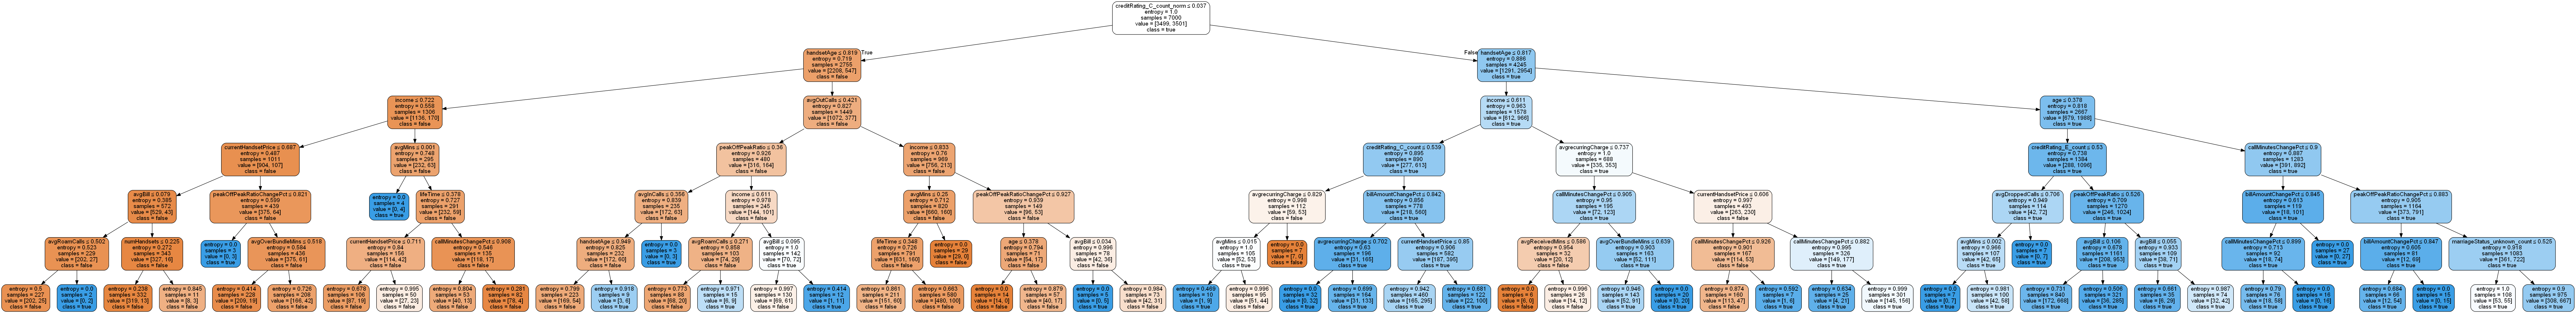

### K-Neighbors Classifier

In [31]:
def kneighbors(X_train, y_train, X_test, y_test):
    try:
        clf = KNeighborsClassifier(n_neighbors=7)
        clf_fit_train=clf.fit(X_train,y_train)
        
        clf_predict_train = clf_fit_train.predict(X_train)
        clf_predict_test = clf_fit_train.predict(X_test)
        
#        re = pd.DataFrame(columns=['Actual','Pred'])
#        re['Pred'] = clf_predict_train
#        re['Actual'] = y_train
#        re.to_csv('Results_k.csv')
        
        results = {}
        results['acc_train'] = accuracy_score(y_train, clf_predict_train)
        results['acc_test']  = accuracy_score(y_test, clf_predict_test)
        results['f_train']   = fbeta_score(y_train, clf_predict_train, average='micro', beta=1)
        results['f_test']    = fbeta_score(y_test, clf_predict_test, average='micro', beta=1.5)
        return results

    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message

In [32]:
#kneighbors classifier
resultsK = kneighbors(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for K-Neighbors Classifier-Training, Test sets: %.5f, %.5f" %(resultsK['acc_train'], resultsK['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for K-Neighbors Classifier-Training, Test sets: 0.77157, 0.70900
--------------------------------------------------------------------------------


### SVM Classifier 

In [33]:
def svmClass(X_train, y_train, X_test, y_test):
    try:
        clf = SVC(kernel='poly',degree=2,gamma='auto',random_state=4)
        clf_fit_train=clf.fit(X_train,y_train)
        
        clf_predict_train = clf_fit_train.predict(X_train)
        clf_predict_test = clf_fit_train.predict(X_test)
        
#        re = pd.DataFrame(columns=['Actual','Pred'])
#        re['Pred'] = clf_predict_train
#        re['Actual'] = y_train
#        re.to_csv('Results_s.csv')
        
        results = {}
        results['acc_train'] = accuracy_score(y_train, clf_predict_train)
        results['acc_test']  = accuracy_score(y_test, clf_predict_test)
        results['f_train']   = fbeta_score(y_train, clf_predict_train, average='micro', beta=1)
        results['f_test']    = fbeta_score(y_test, clf_predict_test, average='micro', beta=1.5)
        
        return results
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message    

In [34]:
#SVM classifier
resultsS = svmClass(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for SVM Classifier-Training, Test sets: %.5f, %.5f" %(resultsS['acc_train'], resultsS['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for SVM Classifier-Training, Test sets: 0.73757, 0.74000
--------------------------------------------------------------------------------


### Neural Net Classifier

In [35]:
def neunet(X_train, y_train, X_test, y_test):
    try:
        clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(10, 1), random_state=1)
        clf_fit_train = clf.fit(X_train, y_train)

        clf_predict_train = clf_fit_train.predict(X_train)
        clf_predict_test = clf_fit_train.predict(X_test)
        
#        re = pd.DataFrame(columns=['Actual','Pred'])
#        re['Pred'] = clf_predict_train
#        re['Actual'] = y_train
#        re.to_csv('Results_n.csv')
        
        results = {}
        results['acc_train'] = accuracy_score(y_train, clf_predict_train)
        results['acc_test']  = accuracy_score(y_test, clf_predict_test)
        results['f_train']   = fbeta_score(y_train, clf_predict_train, average='micro', beta=1)
        results['f_test']    = fbeta_score(y_test, clf_predict_test, average='micro', beta=1.5)
        
        return results        
        
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message    

In [36]:
#neural net classifier with back propogation
resultsN = neunet(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for Neural Net Classifier-Training, Test sets: %.5f, %.5f" %(resultsN['acc_train'], resultsN['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for Neural Net Classifier-Training, Test sets: 0.74271, 0.74033
--------------------------------------------------------------------------------


### Random forest Classifier

In [37]:
def randomForest(X_train,y_train,X_test,y_test):
    try:
        clf = RandomForestClassifier(criterion='entropy',max_depth=2, random_state=3,bootstrap=True,max_features='sqrt')
        clf.fit(X_train,y_train)
        clf_predict_train = clf.predict(X_train)
        clf_predict_test = clf.predict(X_test)
        
#        re = pd.DataFrame(columns=['Actual','Pred'])
#        re['Pred'] = clf_predict_train
#        re['Actual'] = y_train
#        re.to_csv('Results_r.csv')
        
        #Display Important features
        dic = {'feature':X_train.columns, 'Import':clf.feature_importances_}
        f_imp = pd.DataFrame(dic)
        f_imp = f_imp.sort_values(by=['Import'],ascending=False)
        imp_features = f_imp.loc[f_imp.Import > 0, 'feature']
        #print(f_imp)
        
        results = {}          
        results['acc_train'] = accuracy_score(y_train, clf_predict_train)
        results['acc_test']  = accuracy_score(y_test, clf_predict_test)
        results['f_train']   = fbeta_score(y_train, clf_predict_train, average='micro', beta=1)
        results['f_test']    = fbeta_score(y_test, clf_predict_test, average='micro', beta=1.5)
         
        return results,imp_features.tolist()
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message


In [38]:
results,imp_features = randomForest(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for Random forest Classifier - Training, Test sets: %.5f, %.5f" %(results['acc_train'], results['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for Random forest Classifier - Training, Test sets: 0.73786, 0.74200
--------------------------------------------------------------------------------


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Analysis:
- We have implemented 5 different classifiers for our data. Decision Tree, K neighbors, SVM, Neural net and Random forest classifiers. 
- Decision Tree, Ramdom forest and SVM can be considered as linear classifiers and K-Neighbors can be considered as non-linear classifiers. Neural networks can be linear and non linear basing on the activation function. In our classifer we are usig Relu
- By observing the accuracies of all the classifers, we can say that our Linear classifiers has good accuracy than our non-linear classifiers. Neural net classifier also has good performance. 

No we can reduce try implementing our above models for selected features. We can use following methonds
    1. Using important features function from random forest 
    2. By doing a PCA analysis to reduce the total number of dimensions.

In [39]:
#Use only imporatant features from random forest
X_train_h = X_train
X_test_h = X_test
X_train = X_train[imp_features]
X_test  = X_test[imp_features]

In [40]:
#SVM classifier
resultsS = svmClass(X_train, y_train, X_test, y_test)
print "Accuracy for SVM Classifier-Training, Test sets: %.5f, %.5f" %(resultsS['acc_train'], resultsS['acc_test'])     
print "-----------------------------------------------------------------------"

Accuracy for SVM Classifier-Training, Test sets: 0.73757, 0.74000
-----------------------------------------------------------------------


In [41]:
#neural net classifier with back propogation
resultsN = neunet(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for Neural Net Classifier-Training, Test sets: %.5f, %.5f" %(resultsN['acc_train'], resultsN['acc_test'])     
print "--------------------------------------------------------------------------------"

--------------------------------------------------------------------------------
Accuracy for Neural Net Classifier-Training, Test sets: 0.74500, 0.73733
--------------------------------------------------------------------------------


Analysis:
    1. We can see there is no increase in the performance. Infact, our SVM has very little less accuracy than our model when we considered the full number of features.

In [42]:
def pcaComp(X_train,X_test,ncomp):
    try:
        pca = PCA(n_components=ncomp)
        X_train_red = pca.fit_transform(X_train)
        X_test_red = pca.fit_transform(X_test)
        X_train_df = pd.DataFrame(X_train_red,columns=['PCA%i' % i for i in range(ncomp)], index=X_train.index)
        X_test_df = pd.DataFrame(X_test_red,columns=['PCA%i' % i for i in range(ncomp)], index=X_test.index)
        return X_train_df, X_test_df
    except Exception as ex:
        print "-----------------------------------------------------------------------"
        template = "An exception of type {0} occurred. Arguments:\n{1!r}"
        message = template.format(type(ex).__name__, ex.args)
        print message     

In [43]:
#Apply PCA to reduce the dimensions
X_train = X_train_h
X_test = X_test_h
X_train, X_test = pcaComp(X_train, X_test,10)
X_train.to_csv('pca_dim.csv')

In [44]:
#SVM classifier
resultsS = svmClass(X_train, y_train, X_test, y_test)
print "Accuracy for SVM Classifier-Training, Test sets: %.5f, %.5f" %(resultsS['acc_train'], resultsS['acc_test'])     
print "-----------------------------------------------------------------------"
#neural net classifier with back propogation
resultsN = neunet(X_train, y_train, X_test, y_test)
print "--------------------------------------------------------------------------------"
print "Accuracy for Neural Net Classifier-Training, Test sets: %.5f, %.5f" %(resultsN['acc_train'], resultsN['acc_test'])     
print "--------------------------------------------------------------------------------"

Accuracy for SVM Classifier-Training, Test sets: 0.73757, 0.73700
-----------------------------------------------------------------------
--------------------------------------------------------------------------------
Accuracy for Neural Net Classifier-Training, Test sets: 0.49986, 0.50033
--------------------------------------------------------------------------------


Analysis:
    1. Not much improvement is seen by using PCA. As the number of components is decreased, Neural net's performance is effected.

### Question1

Issue with data:
- Categorical data
    1. We have two features that have missing values. For one feature, we have 74% of missing values so we omitted. For another feature, we have filled missing values with frequent ones with its churn type.
    2. We have features that have same class with different names. Like 's' and 'suburban'; 't' and 'true'. We have replaced the correlated classes with same meaningful one. Like replaced 's' with 'suburban'; 't' with 'true'.

- Numerical data
    1. We have features with negative values. Model can be sensitive towards negative values. We plotted distribution of the feature to figure out a strategy to deal with negative values. For one feature, we just replaced negative values with zero, as the number of negative values is less. For other features, we used min(negative value) while logarthmic transformation.
    2. By looking at the statistics of the numerical data, we dreived that we have skewed values. Usually for features, having outliers, difference between mean and standard deviation would be considerable. We used Logarthmic transformation to correct the skewness.
    3. We have different features with differnt scales. Having different sacles would harm the model, so we used minmax scaler which makes all the features value between 0 and 1.

- Normalization
    1. For most of the features, the counts of different classes are similar when churn=true and churn=false. This might establish similar patterns for similar sets of data with different target class. 
    2. We can use normalized featurs as a stragegy to break above patterns. We used used count and mean of categorical values after one-hot encoding. We then normalized the counts. Normalization was useful. 

### Question2

Classifiers: We used different classifiers to see the performance.
- Decision tree: This is a linear classifier. We have high number of features around 40. Decistion tree might not perform better with more number of features. We have Training accuracy = 0.75471 and Testing accuracy = 0.73700
- Random Forest: Ths is like a multitude of decision trees running with bootstrapping the features and samples. This also a linear classifier and might not perform well in the presence of high dimensions. We have Training accuracy = 0.73786 and Testing accuracy = 0.74200
- K neighbhors: This is a non-linear classifier. We have Training accuracy = 0.77157 and Testing accuracy = 0.70900. We can see little less testing accuracy than the training. We can see little overfitting on Training data.
- SVM: This is a linear classifier and good for high dimensional data. We have Training accuracy = 0.73757 and testing accuracy = 0.74000
- Neural net classifier: This could be linear or non-linear basing on the activation function. We use Relu which is piece-wise linear activation function. This could handle high dimensional data. We have Training accuracy = 0.74271 and Testing accuracy = 0.74033

### Question3

From above accuracy information, I think SVM and Neural Network classifier are good to evaluate the given data for following reasons.
- I think, our data has underlying linearity between features. Both SVM and Neural network are linear classifiers. At high dimensions also, SVM behaves as linear classifier. Both the classifiers can handle high dimensional data. We have consistent training and testing accuracies.
- Out of SVM and neural net classifiers, I would prefer neural net classifier as it has consistent training and testing accuracies.

### Extra credit

According to new information
- Service to churner costs then company 700dol
- Excluding a non-churner costs 100dol

From above information, we can say that
- Classifying a churner as non-churner would cost 700dol
- Classifying a non-churner as a churner would cost 100dol

Inorder to include this information in to our model, we are going to use weights to the classes in our target variable 'Churn'. Ratio would 1:7, we would make our model penalize 7 times more when a churner is classified as non-churner than the vice-versa.

In [46]:
#change the classes of target variable
X_train = X_train_h
X_test = X_test_h
y_train.loc[y_train == False] = 0
y_train.loc[y_train == True] = 1
y_test.loc[y_test == False] = 0
y_test.loc[y_test == True] = 1

cw = {1:7,0:1}
clf_s = SVC(kernel='poly',degree=2,gamma='auto',random_state=4,class_weight=cw)
clf_fit_train_s=clf_s.fit(X_train,y_train)
        
clf_predict_train_s = clf_fit_train_s.predict(X_train)
clf_predict_test_s = clf_fit_train_s.predict(X_test)

resultsv = {}
resultsv['acc_train'] = accuracy_score(y_train, clf_predict_train_s)
resultsv['acc_test']  = accuracy_score(y_test, clf_predict_test_s)
resultsv['f_train']   = fbeta_score(y_train, clf_predict_train_s, average='micro', beta=1)
resultsv['f_test']    = fbeta_score(y_test, clf_predict_test_s, average='micro', beta=1.5)


print "Accuracy for SVM Classifier-Training, Test sets: %.5f, %.5f" %(resultsv['acc_train'], resultsv['acc_test'])     
print "-----------------------------------------------------------------------"

Accuracy for SVM Classifier-Training, Test sets: 0.50014, 0.49967
-----------------------------------------------------------------------


Analysis:
- We can see introducing class weights had decreased the accuracy of the model. 
- To increase, I think we need to work on strategy to include new features which could make the model understand the domain knowledge of the data.